# CMS Event Data Classification 

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from functools import reduce

%matplotlib inline

In [3]:
# Hiding warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [4]:
# Reading in the data as csv
data_bg = pd.read_csv("output_data/BackgroundRegionData.csv") # Background Region
data_bg['signal'] = 'background'

In [5]:
data_elec = pd.read_csv("output_data/ElectronRegionData.csv") # Electron Region
data_elec['signal'] = 'electron'

In [6]:
data_tau = pd.read_csv("output_data/TauRegionData.csv") # Tau Region
data_tau['signal'] = 'tau'

Merge all three data.

In [7]:
# Combine as a list
data = [data_bg, data_elec, data_tau]

In [8]:
# Concatenate into a pandas dataframe
df_merged = pd.concat(data)

In [9]:
# View the merged data head
df_merged.head()

,event,eta,phi,et,position,electron,tau,signal
0,0,0,0,11.38480,0,0,1,background
1,0,0,1,9.11070,4,0,0,background
2,0,0,2,13.66120,16,0,0,background
3,0,0,3,3.50377,14,0,0,background
4,0,0,4,9.45493,2,0,0,background


**Data Dictionary**

- event: Event number (Integer)
- eta: Index of eta coordinate 0-13 (Integer)
- phi: Index of phi coordinate, 0-17, which is also specifies the optical link (Integer)
- et: Transverse energy deposited in the region (Float)
- position: Position of the cluster within the region, a 4-bit number (Integer)
- electron: Electron bit signifying that the region likely has an electron or photon deposit (Bool)
- tau: Tau bit signifying that the region likely has a tau deposit (Bool)

In [10]:
# Check the shape of the merged dataframe
df_merged.shape

(193536, 8)

In [11]:
# Sort the values based on event
df_merged.sort_values('event', inplace=True)

Check for null values.

In [12]:
df_merged.isnull().sum()

event       0
eta         0
phi         0
et          0
position    0
electron    0
tau         0
signal      0
dtype: int64

There are no null values in the data.

### Exploratory Data Analysis (EDA)

We are performing EDA on the mock data for CMS Experiment.

Plotting the et values for each dataset (each region).

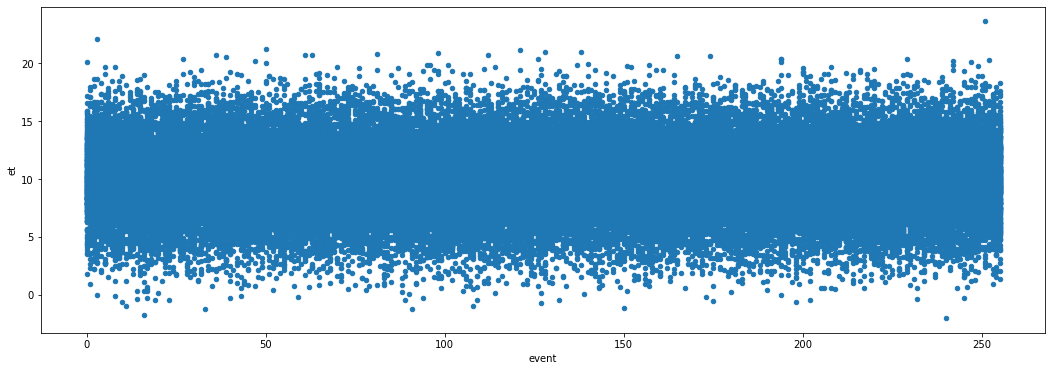

In [13]:
# Background region data
data_bg.plot.scatter(x='event', y = 'et', figsize = (18,6))

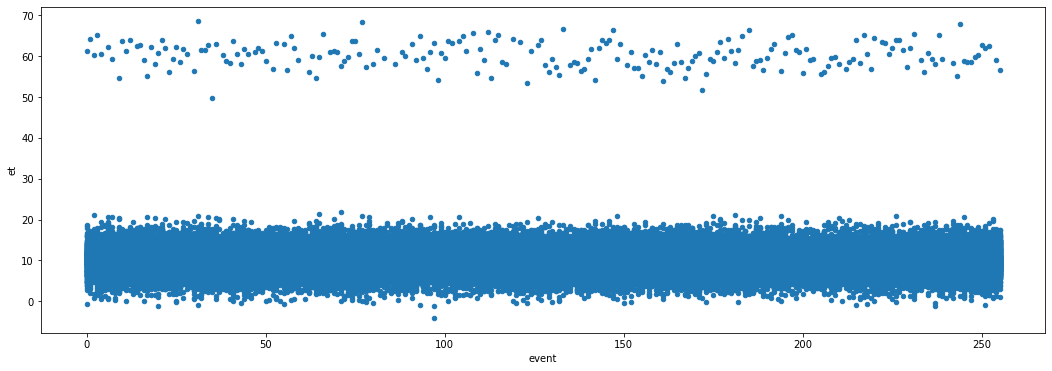

In [14]:
# Electron region data
data_elec.plot.scatter(x='event', y = 'et', figsize = (18,6))

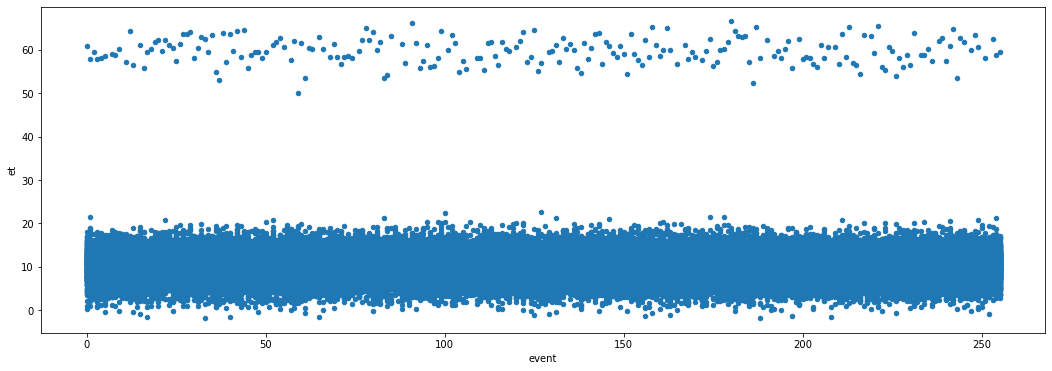

In [15]:
# Tau region data
data_tau.plot.scatter(x='event', y = 'et', figsize = (18,6))

We can see that the `electron` and `tau` datasets have segmented values of 'et' with most values segmented in lower bottom when plotted visually.

### Plotting the signals onto a matrix

We are using the elctron region data for the 0th event.

In [16]:
event_data = data_elec.loc[data_elec['event'] == 0]

In [17]:
event_data.head()

,event,eta,phi,et,position,electron,tau,signal
0,0,0,0,12.15180,9,0,0,electron
1,0,0,1,10.19040,5,0,0,electron
2,0,0,2,7.06514,6,0,0,electron
3,0,0,3,6.87023,14,0,0,electron
4,0,0,4,5.66144,1,0,0,electron


### Electron regions

In [18]:
# Convert the series into a 14x18 matrix
x_elec = np.array(event_data['electron'])
matrix_electron = np.asmatrix(x_elec)

# Resizing into size 14x18
matrix_electron.resize((14, 18))

Plotting the values of matrix on 2D plot

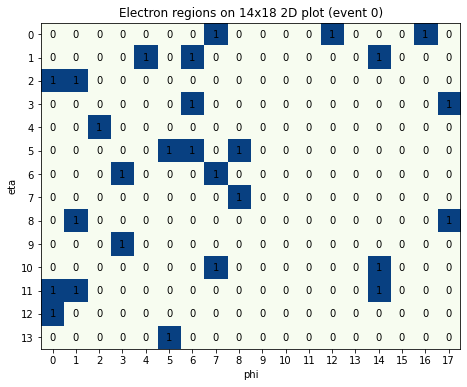

In [19]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_electron, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_electron.shape[0]))
plt.xticks(range(matrix_electron.shape[1]))
plt.title('Electron regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_electron.shape[0]):
    for y in range(matrix_electron.shape[1]):
        ax.annotate(str(matrix_electron[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

In [20]:
# Checking
event_data[(event_data.eta == 1) & (event_data.phi == 5)]

,event,eta,phi,et,position,electron,tau,signal
23,0,1,5,4.79889,11,0,0,electron


### Tau regions

In [21]:
# Convert the series into a 14x18 matrix
x_tau = np.array(event_data['tau'])
matrix_tau = np.asmatrix(x_tau)

# Resizing into size 14x18
matrix_tau.resize((14, 18))

Plotting the values of matrix on 2D plot

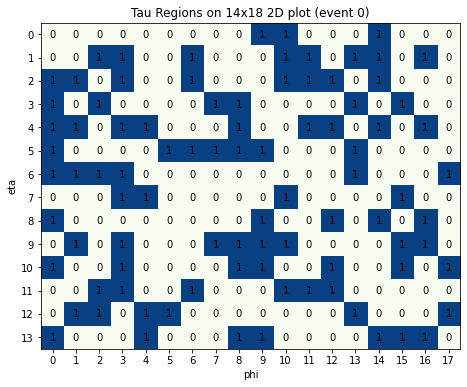

In [22]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_tau, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_tau.shape[0]))
plt.xticks(range(matrix_tau.shape[1]))
plt.title('Tau Regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_tau.shape[0]):
    for y in range(matrix_tau.shape[1]):
        ax.annotate(str(matrix_tau[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()


### ET values

In [23]:
# Convert the series into a 14x18 matrix
x_et = np.array(event_data['et'])
matrix_et = np.asmatrix(x_et)

# Resizing into size 14x18
matrix_et.resize((14, 18))

In [24]:
# View the matrix
matrix_et

matrix([[12.1518  , 10.1904  ,  7.06514 ,  6.87023 ,  5.66144 ,
          4.74265 , 11.8371  ,  9.57456 ,  2.85446 , 11.1257  ,
          9.09568 ,  6.46432 , 11.4025  , 11.488   ,  9.46717 ,
          6.86677 , 10.857   ,  9.95391 ],
        [12.9616  , 11.627   ,  6.9384  , 11.8455  ,  6.85379 ,
          4.79889 ,  8.95338 ,  5.232   , 11.8398  ,  5.21986 ,
         10.2813  , 16.6035  ,  6.40747 , 17.8355  , 61.2263  ,
         12.8545  ,  8.34197 ,  7.65753 ],
        [ 8.67556 , 10.9044  , 13.5767  ,  6.55393 , 11.0815  ,
         13.6121  , 13.5853  , 12.0453  , 14.323   ,  9.66951 ,
          9.5082  , 12.1601  ,  9.13667 , 12.0633  ,  7.60152 ,
          7.42437 , 10.3129  , 12.6219  ],
        [11.3169  , 12.5299  , 11.3731  ,  9.64484 ,  6.42877 ,
          8.32366 , 12.3695  , 12.5982  ,  9.27314 ,  9.30789 ,
         10.0052  , 11.9414  ,  9.16978 , 11.23    , 11.2227  ,
          3.31536 , 14.2439  , 12.9276  ],
        [ 6.1857  , 11.8325  ,  8.75215 , 11.3837  ,  7.0878

**Plot the 2-D matrix**

Text(0.5, 1.0, 'ET values on a 14x18 2-D plot')

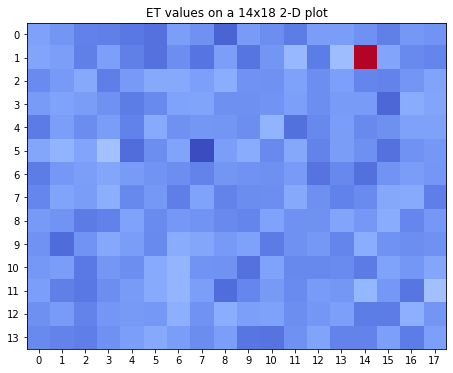

In [25]:
plt.figure(figsize=(18,6))
plt.imshow(matrix_et, cmap=plt.cm.coolwarm)
plt.yticks(range(matrix_et.shape[0]))
plt.xticks(range(matrix_et.shape[1]));
plt.title("ET values on a 14x18 2-D plot")

### Plotting Mean ET values

Group the data by 'event' and calculate the mean of Energy transmission of each set of events in the merged dataset.

In [26]:
# Group
et_mean = df_merged.groupby(['event'], as_index=False)[['et']].mean()

In [27]:
# check the new grouped data
et_mean.head()

,event,et
0,0,10.283522
1,1,10.192143
2,2,10.040871
3,3,10.148479
4,4,10.031728


In [28]:
# Renaming the column names
et_mean.columns = ['event', 'et_mean']

# Looking at the first five rows
et_mean.head()

,event,et_mean
0,0,10.283522
1,1,10.192143
2,2,10.040871
3,3,10.148479
4,4,10.031728


Plot the mean values to see their distribution.

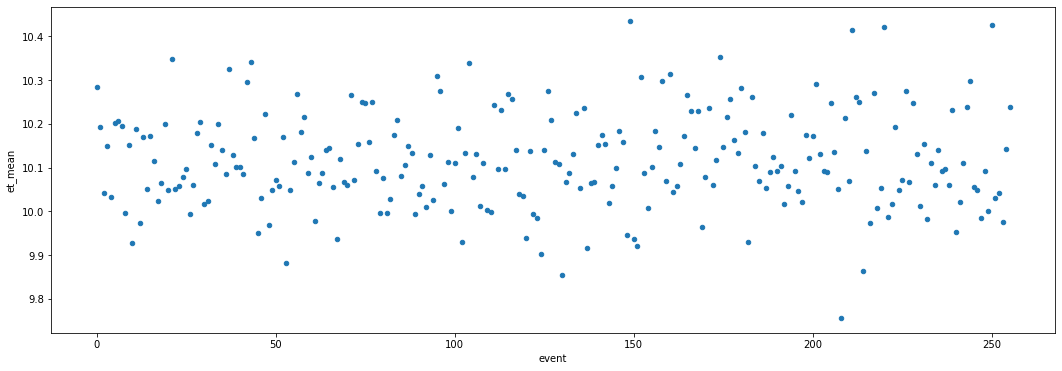

In [29]:
et_mean.plot.scatter(x='event', y = 'et_mean', figsize = (18,6))

Merge the original data and the mean values into a new dataframe.

In [30]:
new_data = df_merged.merge(et_mean, on='event')

In [31]:
# View the data
new_data.head()

,event,eta,phi,et,position,electron,tau,signal,et_mean
0,0,0,0,11.38480,0,0,1,background,10.283522
1,0,5,0,8.07097,16,0,1,tau,10.283522
2,0,4,17,6.47995,5,0,0,tau,10.283522
3,0,4,16,8.57781,2,0,1,tau,10.283522
4,0,4,15,7.59340,0,0,0,tau,10.283522


In [32]:
# Maximum value of ET
new_data['et'].max()

68.5087

In [33]:
# Maximum value of mean ET
new_data['et_mean'].max()

10.434053322751316

Checking for a particular event

In [34]:
zero_df = new_data.loc[new_data['event'] == 0]

In [35]:
zero_df.head()

,event,eta,phi,et,position,electron,tau,signal,et_mean
0,0,0,0,11.38480,0,0,1,background,10.283522
1,0,5,0,8.07097,16,0,1,tau,10.283522
2,0,4,17,6.47995,5,0,0,tau,10.283522
3,0,4,16,8.57781,2,0,1,tau,10.283522
4,0,4,15,7.59340,0,0,0,tau,10.283522


In [36]:
zero_df.shape

(756, 9)

We have 252 rows of data and 8 columns.

In [37]:
# Getting the value of event count
zero_df['count'] = zero_df.index

Text(0, 0.5, 'ET values')

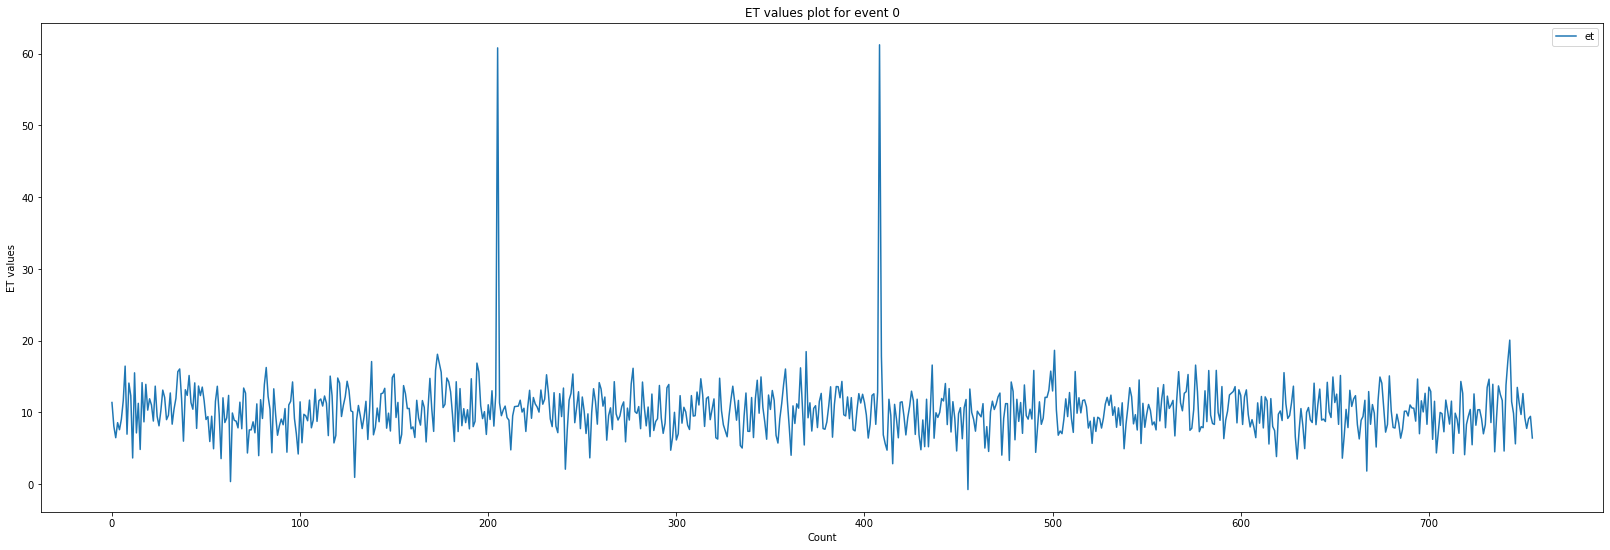

In [38]:
zero_df.plot.line(x='count', y = 'et', figsize=(28,9))
plt.title("ET values plot for event 0")
plt.xlabel("Count")
plt.ylabel("ET values")

Cropping the high peaks of ET based on z-score

In [39]:
et_df = zero_df[['et']]
et_df_signal = et_df[(np.abs(stats.zscore(et_df)) < 2).all(axis=1)]

Plotting both the graphs on the same plot to see the difference.

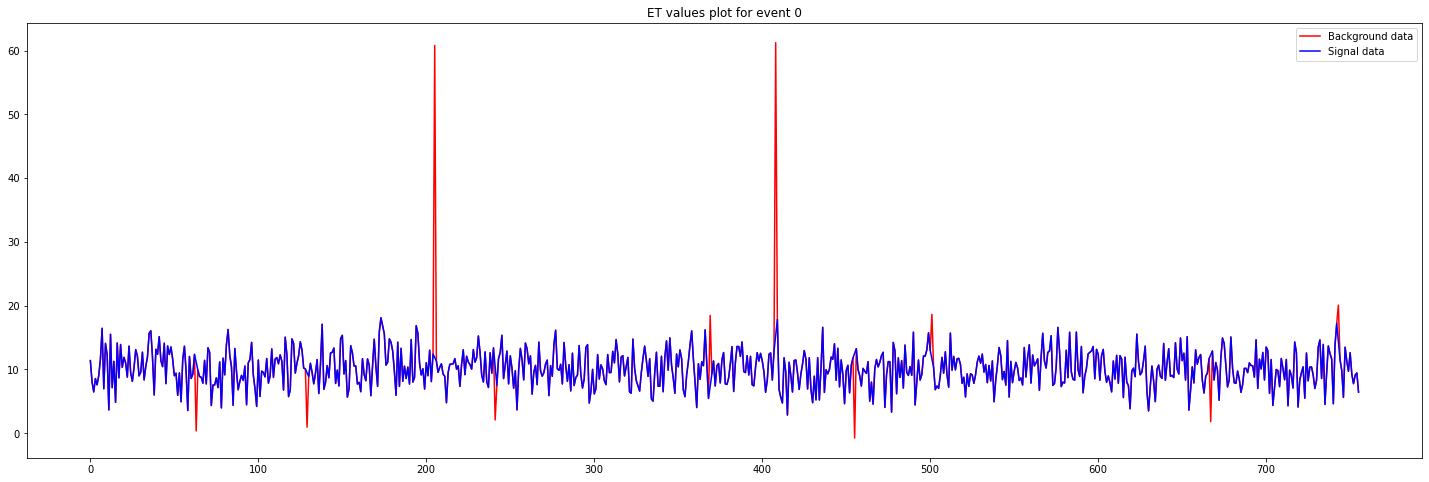

In [40]:
plt.figure(figsize=(25,8))
plt.plot(et_df,'r', label='Background data')
plt.plot(et_df_signal, 'b' ,label='Signal data')
plt.title("ET values plot for event 0")
plt.legend()

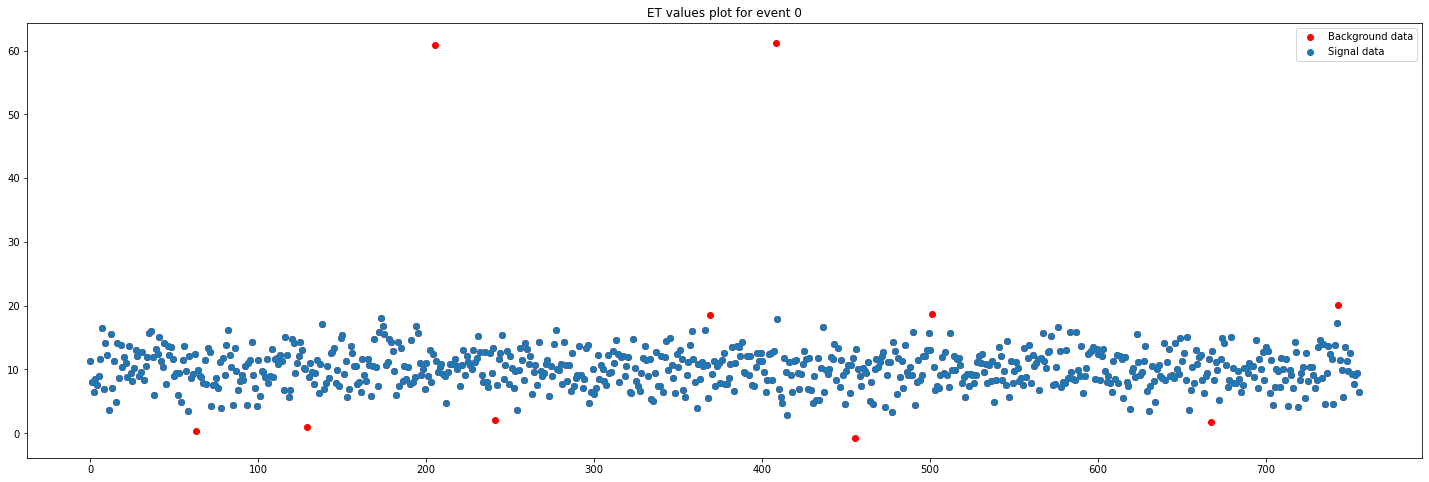

In [41]:
plt.figure(figsize=(25,8))
plt.scatter(et_df.index, et_df['et'], label='Background data', color = "red")
plt.scatter(et_df_signal.index, et_df_signal['et'], label='Signal data')
plt.title("ET values plot for event 0")
plt.legend()

---

### Model building 

Possible methods to use:
- K-means Clustering, DBSCAN, PCA
- Isolation Forest
- Deep Learning methods

### Principal Component Analysis (PCA)

Before performing PCA, the data needs to be scaled.

In [43]:
zero_df.columns

Index(['event', 'eta', 'phi', 'et', 'position', 'electron', 'tau', 'signal',
       'et_mean', 'count'],
      dtype='object')

In [44]:
zero_df

,event,eta,phi,et,position,electron,tau,signal,et_mean,count
0,0,0,0,11.38480,0,0,1,background,10.283522,0
1,0,5,0,8.07097,16,0,1,tau,10.283522,1
2,0,4,17,6.47995,5,0,0,tau,10.283522,2
3,0,4,16,8.57781,2,0,1,tau,10.283522,3
4,0,4,15,7.59340,0,0,0,tau,10.283522,4
...,...,...,...,...,...,...,...,...,...,...
751,0,5,5,9.26547,13,0,0,background,10.283522,751
752,0,4,10,7.77333,13,0,0,background,10.283522,752
753,0,0,1,9.11070,4,0,0,background,10.283522,753
754,0,0,4,9.45493,2,0,0,background,10.283522,754


In [73]:
# Numerical features
numerical_feats = ['eta', 'phi', 'et', 'position', 'electron', 'tau']

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# We are taking data for first event in our dataframe
df = zero_df[numerical_feats]

# Fitting the standard scaler to our data
df = StandardScaler().fit_transform(df)

# Converting the scaled data into a dataframe
df_scaled = pd.DataFrame(df)

In [75]:
# Initializing PCA
pca = PCA()

In [76]:
# Fitting the model to the data
principalComponents = pca.fit_transform(df_scaled)

In [77]:
# Getting the data as a dataframe
principalDf = pd.DataFrame(data = principalComponents)

# View the first five rows of dataframe
principalDf.head()

,0,1,2,3,4,5
0,1.281987,0.974575,-0.433115,-2.410981,0.796488,0.952478
1,-0.064912,0.484988,-1.230269,-1.262492,-2.133857,0.418530
2,-0.718513,-1.250357,-0.325868,0.135885,1.459374,-0.776911
3,-0.857653,0.257761,0.182997,-1.465366,1.407529,-1.152764
4,-0.040326,-1.108951,0.209809,-0.230313,2.000807,-0.506910


### Feature relationships

Plotting the data distribution between different experiment data for the event 0.

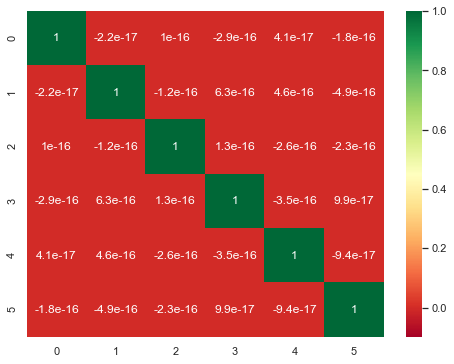

In [78]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.heatmap(principalDf.corr(method='pearson'), vmin=-.1, vmax=1,  annot=True, cmap='RdYlGn')
plt.show()

### K-Means

We will now apply K-Means Clustering to the dataframe that we generated using PCA.

In [79]:
from sklearn.cluster import KMeans

In [86]:
data = principalDf

In [87]:
# Initializing the model
kmean = KMeans(n_clusters=2)

In [88]:
# FItting the model to the data
kmean.fit(data)

KMeans(n_clusters=2)

Print the value of centroids.

In [89]:
centroids = kmean.cluster_centers_
print(centroids)

[[ 1.82273302  1.41441741 -0.72263904  1.22519894  0.03505134 -1.37735149]
 [-0.20074152 -0.15577284  0.0795858  -0.1349338  -0.00386028  0.15169069]]


Predict and cluster the data into two label groups (0, 1).

In [90]:
data['Label'] = kmean.predict(data)

Plotting the value counts of our predicted labels.

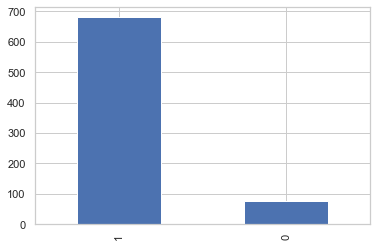

In [91]:
data['Label'].value_counts().plot(kind = 'bar');

**Plotting the data clusters based on the predicted labels.**

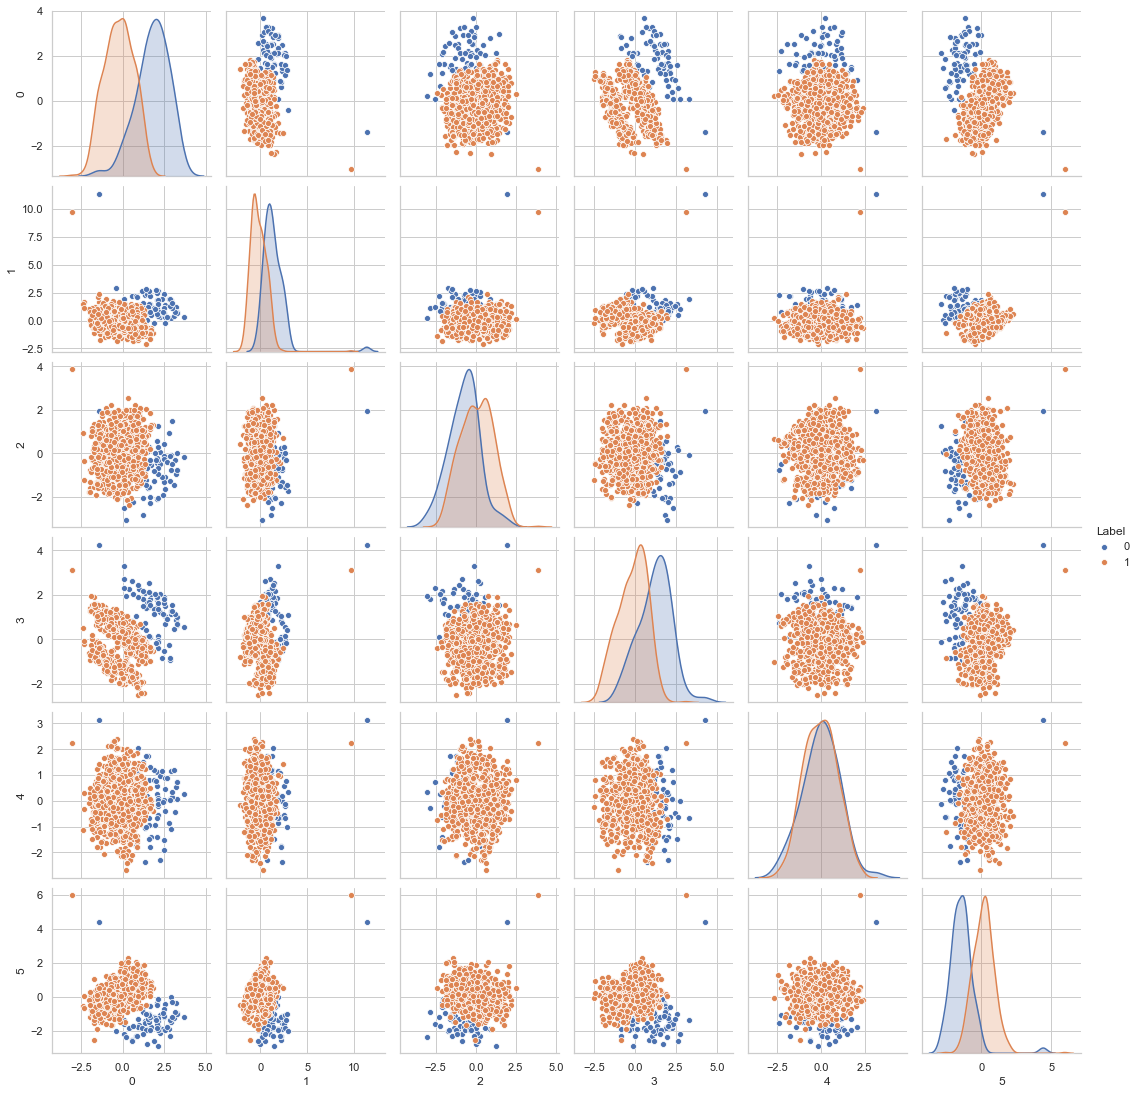

In [92]:
sns.pairplot(data, hue='Label')

### Agglomerative CLustering

In [94]:
from sklearn.cluster import AgglomerativeClustering

In [95]:
# We can tell it how many clusters we're aiming for
agg_clust = AgglomerativeClustering(n_clusters=2)

# Using scaled dataframe
assigned_clusters = agg_clust.fit_predict(df_scaled)

In [97]:
data['AggLabel'] = assigned_clusters

**Plotting the data clusters based on the predicted labels.**

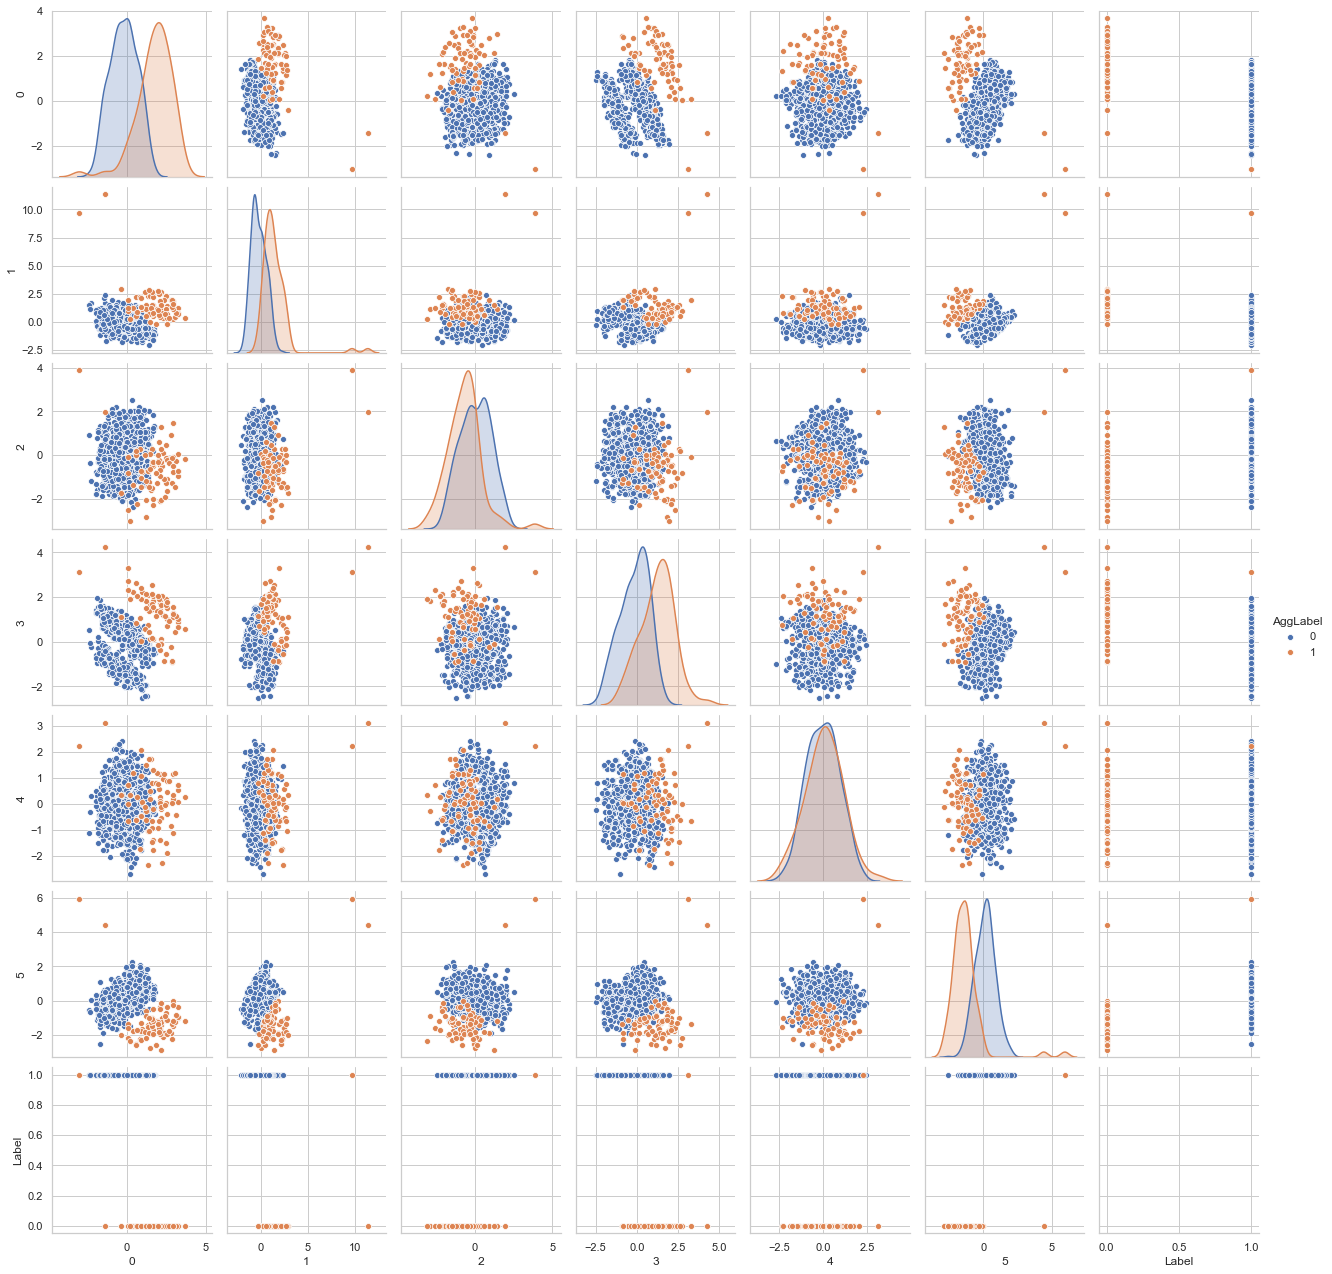

In [98]:
sns.pairplot(data, hue='AggLabel')